In [1]:
import torch
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
testset = CIFAR10(root='/tmp/', train=False, transform=ToTensor(), download=True)
nclasses = len(testset.classes)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /tmp/cifar-10-python.tar.gz to /tmp/


In [2]:
trainloder = DataLoader(testset, batch_size=len(testset), shuffle=False)
imgs, labels = next(iter(trainloder))
imgs = torch.flatten(imgs, start_dim=1, end_dim=3).unsqueeze(0)


In [3]:
all_distances = torch.cdist(imgs, imgs, p=2.0).squeeze()

In [4]:
labeled_distances = torch.empty([nclasses, nclasses, len(testset)//nclasses, len(testset)//nclasses])
for l1 in range(nclasses):
    for l2 in range(nclasses):
        sub_distance = all_distances[labels==l1]
        sub_distance = sub_distance.T[labels==l2]
        labeled_distances[l1, l2] = sub_distance
        
min_dists = torch.empty(nclasses, nclasses)
for l1 in range(nclasses):
    for l2 in range(nclasses):
         min_dists[l1, l2] = labeled_distances[l1,l2].min()

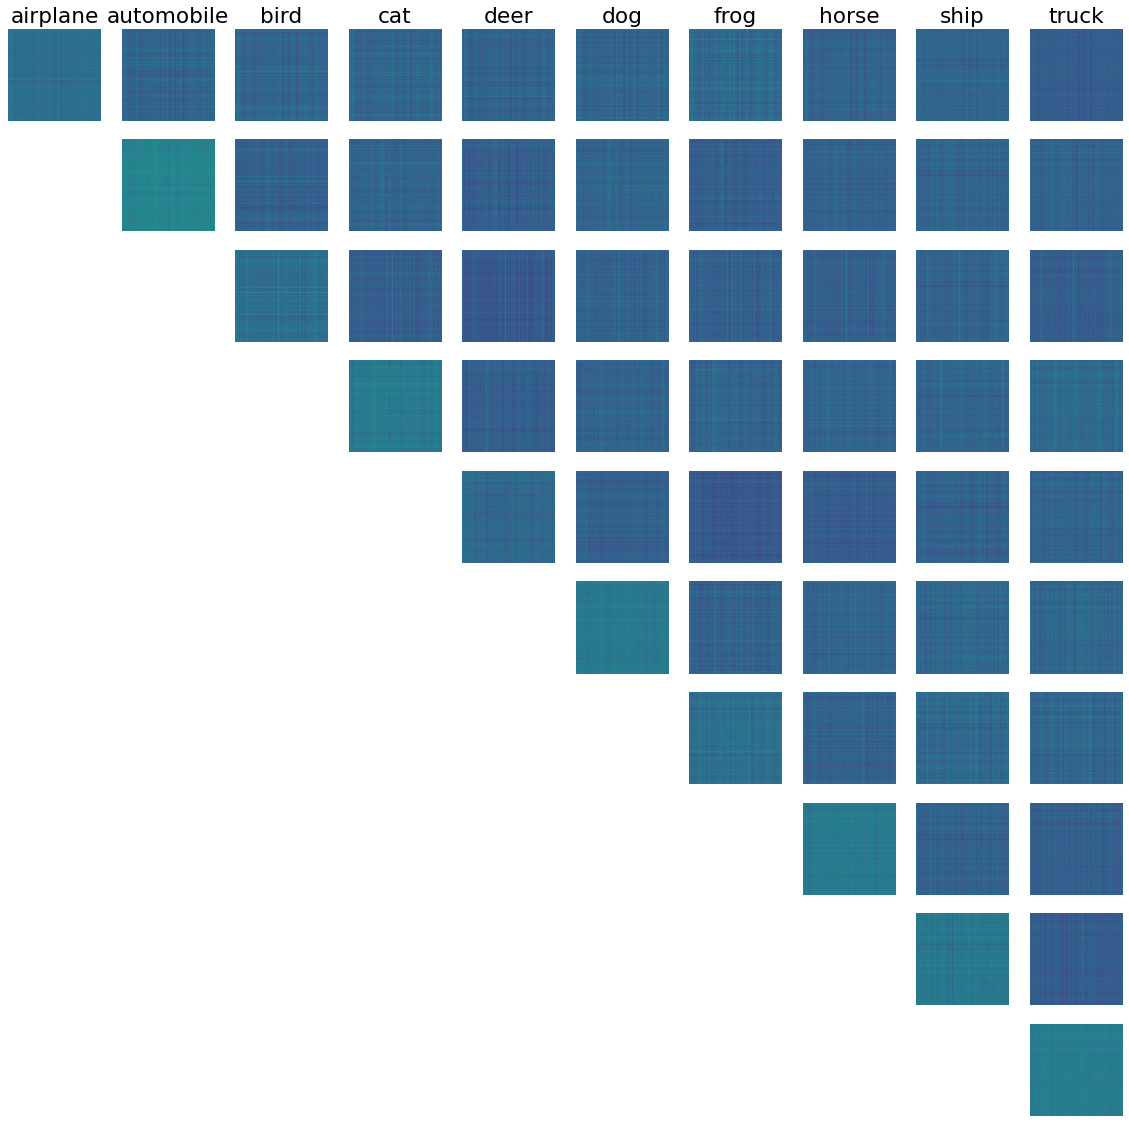

In [5]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nclasses,nclasses, figsize=(20,20), sharey=True, sharex=True)
for i in range(nclasses):
    for j in range(nclasses):
        if i <= j:
            ax[i,j].imshow(labeled_distances[i,j])
        if i==0:
            ax[i,j].set_title(testset.classes[j])            
        ax[i,j].axis('off')


In [6]:
import pandas
df_min = pandas.DataFrame(min_dists.numpy(), index=testset.classes, columns=testset.classes)

In [7]:
df_min.columns.name = 'cls'
df_min

cls,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.000000,7.562879,3.930953,4.977697,4.435863,5.880960,4.532516,5.485109,4.228201,7.101593
automobile,7.562879,0.000000,6.989599,7.436474,6.930317,7.847360,7.452196,7.853844,6.829359,8.090198
bird,3.930953,6.989599,0.000000,5.124202,4.221628,4.734994,3.605644,5.009171,5.139681,6.870951
cat,4.977697,7.436474,5.124202,0.000000,5.227794,6.031938,5.158812,6.295508,5.780553,6.520710
deer,4.435863,6.930317,4.221628,5.227794,0.000000,4.644569,4.648004,5.599464,4.852978,6.052711
dog,5.880960,7.847360,4.734994,6.031938,4.644569,0.000000,5.512792,6.239454,5.635169,7.472602
frog,4.532516,7.452196,3.605644,5.158812,4.648004,5.512792,0.000000,5.516184,4.684504,6.969069
horse,5.485109,7.853844,5.009171,6.295508,5.599464,6.239454,5.516184,0.000000,6.224666,7.835754
ship,4.228201,6.829359,5.139681,5.780553,4.852978,5.635169,4.684504,6.224666,0.000000,6.980196
truck,7.101593,8.090198,6.870951,6.520710,6.052711,7.472602,6.969069,7.835754,6.980196,0.000000


In [8]:
for l1 in range(10):
    for l2 in range(10):
        if l1!= l2:
            idx = torch.argmin(labeled_distances[l1,l2])
            val = torch.min(labeled_distances[l1,l2])

            print(f'{testset.classes[l1]}, {testset.classes[l2]}: minimum index {idx}, minimum val {val}')

airplane, automobile: minimum index 761059, minimum val 7.5628790855407715
airplane, bird: minimum index 322481, minimum val 3.930953025817871
airplane, cat: minimum index 990914, minimum val 4.977696895599365
airplane, deer: minimum index 200085, minimum val 4.435863018035889
airplane, dog: minimum index 980914, minimum val 5.880960464477539
airplane, frog: minimum index 864085, minimum val 4.532516002655029
airplane, horse: minimum index 618914, minimum val 5.485109329223633
airplane, ship: minimum index 399713, minimum val 4.228201389312744
airplane, truck: minimum index 27772, minimum val 7.101592540740967
automobile, airplane: minimum index 59761, minimum val 7.5628790855407715
automobile, bird: minimum index 450527, minimum val 6.989598751068115
automobile, cat: minimum index 990094, minimum val 7.436474323272705
automobile, deer: minimum index 493104, minimum val 6.930317401885986
automobile, dog: minimum index 833761, minimum val 7.847359657287598
automobile, frog: minimum inde

In [9]:
torch.argmin(labeled_distances[0,1], keepdim=True)

tensor([[761059]])

In [10]:
37438//1000,37438%1000

(37, 438)

In [11]:
img_auto = imgs[0,labels == testset.class_to_idx['bird']][37]
img_truck = imgs[0,labels == testset.class_to_idx['frog']][438]

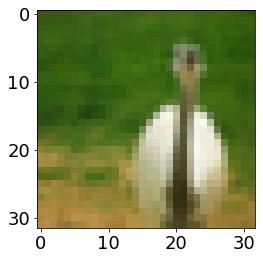

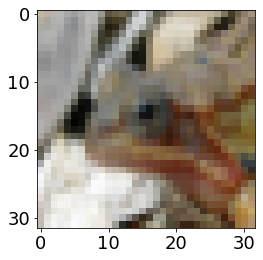

In [12]:
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
plt.imshow(img_auto.reshape(3,32,32).permute(1,2,0))
plt.show()
plt.imshow(img_truck.reshape(3,32,32).permute(1,2,0))


In [13]:
(img_auto - img_truck).norm(2)

tensor(19.5640)

In [14]:
dist_dist = torch.empty([0])
for l1 in range(10):
    for l2 in range(10):
        if l1 > l2:
            dist_dist = torch.cat([dist_dist, labeled_distances[l1,l1].flatten()])

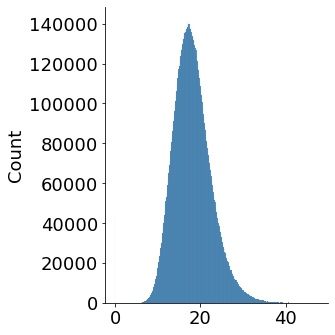

In [18]:
import seaborn as sns
sns.displot(data = dist_dist)

In [ ]:
torch